<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_14/TG14_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PRAKTIKUM 1 - Klasifikasi Cat vs. Dog

## Langkah 1 - Import Library

In [3]:
# Import TensorFlow sebagai backbone deep learning
import tensorflow as tf

# Import modul Keras yang berada di dalam TensorFlow
from tensorflow import keras

# Import layer-layer yang dibutuhkan untuk membangun arsitektur CNN
from keras import layers

## Langkah 2 - Pra Pengolahan Data

### Langkah 2.1 - Pra Pengolahan Data Training

In [4]:
# Load dataset training dari folder secara otomatis (TensorFlow yang membaca struktur folder)
training_set = tf.keras.utils.image_dataset_from_directory(

    # Path ke folder dataset training (berisi subfolder: cat/, dog/)
    '/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/dataset/training_set',

    # Ukuran gambar yang akan di-resize
    image_size=(64, 64),

    # Jumlah gambar per batch saat training
    batch_size=32,

    # Format label: binary (0 atau 1)
    label_mode='binary',

    # Shuffle agar training tidak urut (lebih bagus untuk generalisasi)
    shuffle=True
)

Found 8000 files belonging to 2 classes.


### Langkah 2.2 - Pra Pengolahan Data Testing

In [5]:
# Membuat dataset untuk data pengujian (test set)
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/dataset/test_set',
    image_size=(64, 64),   # Mengubah ukuran setiap gambar menjadi 64x64
    batch_size=32,         # Memproses gambar per batch ukuran 32
    label_mode='binary',   # Karena hanya ada 2 kelas (anjing dan kucing)
    shuffle=False          # Jangan diacak, penting untuk evaluasi
)

# Normalisasi data test (mengubah pixel dari 0-255 menjadi 0-1)
test_ds = test_set.map(lambda x, y: (x/255., y))

Found 2000 files belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1 - Inisiasi Model CNN

In [6]:
# Membuat model CNN menggunakan arsitektur Sequential
cnn = tf.keras.models.Sequential()

### Langkah 3.2 - Pembuatan Layer Konvolusi 1

In [7]:
# Layer konvolusi pertama untuk mengekstrak fitur dasar dari gambar
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Langkah 3.3 - Pembuatan Layer Pooling 1

In [8]:
# Layer max pooling untuk mengurangi dimensi fitur (downsampling)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [9]:
# Convolution + ReLU untuk ekstraksi fitur lanjutan
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Max pooling untuk mengecilkan ukuran feature map
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [10]:
# Mengubah feature map 2D menjadi vektor 1D sebelum masuk ke Dense layer
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [11]:
# Fully-connected layer untuk belajar pola kompleks
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [12]:
# Output layer untuk klasifikasi biner (kucing vs anjing)
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [13]:
# Menyusun model, yaitu optimizer Adam, loss binary_crossentropy, metrik akurasi
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Langkah 4 - Fit CNN

Untuk percobaan ini digunakan 10 epoch agar training lebih cepat, namun model dapat ditingkatkan akurasinya dengan epoch lebih banyak.

In [14]:
# Melatih model CNN menggunakan data training dan data testing selama 10 epoch
cnn.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1812s 7s/step - accuracy: 0.5217 - loss: 8.0200 - val_accuracy: 0.5460 - val_loss: 0.6881
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 308ms/step - accuracy: 0.6115 - loss: 0.6495 - val_accuracy: 0.5780 - val_loss: 0.7192
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 299ms/step - accuracy: 0.6717 - loss: 0.5801 - val_accuracy: 0.6105 - val_loss: 0.7460
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 304ms/step - accuracy: 0.7366 - loss: 0.5003 - val_accuracy: 0.6140 - val_loss: 0.8171
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 295ms/step - accuracy: 0.7929 - loss: 0.4242 - val_accuracy: 0.5930 - val_loss: 1.0314
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 336ms/step - accuracy: 0.8386 - loss: 0.3416 - val_accuracy: 0.6115 - val_loss: 1.2029
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 297ms/step - accuracy: 0.8630 - loss: 0.2858 - val_accuracy: 0.6095 - val_loss: 1.1080
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 298ms/step - accuracy: 0.8899 - loss: 0.

## Langkah 5 - Prediksi dengan 1 Citra

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load gambar
test_image = image.load_img(
    '/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/dataset/single_prediction/cat_or_dog_1.jpg',
    target_size=(64, 64)
)

# Konversi ke array dan normalisasi
test_image = image.img_to_array(test_image) / 255.0

# Ubah shape menjadi (1, 64, 64, 3)
test_image = np.expand_dims(test_image, axis=0)

# Prediksi
result = cnn.predict(test_image)

# Mapping label manual
class_indices = {0: 'cat', 1: 'dog'}

# Tentukan hasil prediksi
if result[0][0] > 0.5:
    prediction = class_indices[1]  # dog
else:
    prediction = class_indices[0]  # cat

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


'cat'

# # PRAKTIKUM 2 - Klasifikasi Multilabel dengan dataset CIFAR

## Langkah 1 - Load Library

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Unduh Dataset CIFAR

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


## Langkah 3 - Verifikasi Data

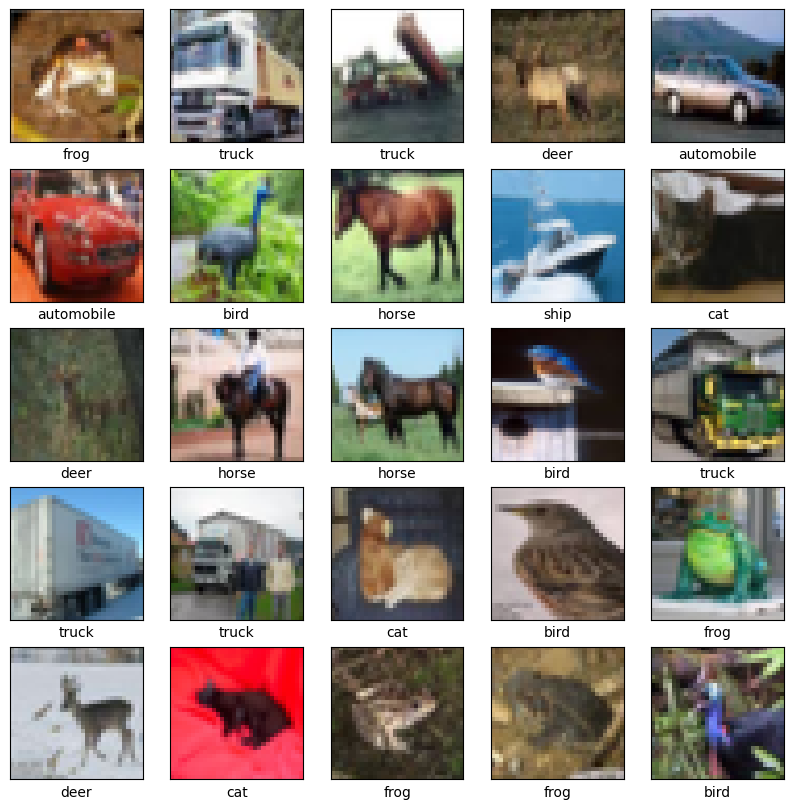

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Label CIFAR-10 berbentuk array, ambil index 0
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN

### Langkah 4.1 - Buat Layer Konvolusi



In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Langkah 4.2 - Cek Arsitektur Konvolusi

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.3 - Tambahkan Layer Fully Connected

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Langkah 4.4 - Cek Arsitektur Model CNN

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.5 - Compile Model CNN

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Langkah 5 - Fit Model

In [24]:
# Ambil subset kecil untuk training cepat (demo/percobaan)
train_images_small = train_images[:5000]
train_labels_small = train_labels[:5000]

test_images_small = test_images[:1000]
test_labels_small = test_labels[:1000]

# Training model dengan subset
history = model.fit(
    train_images_small,        # Data training subset
    train_labels_small,        # Label training subset
    epochs=10,                 # Masih 10 epoch
    validation_data=(test_images_small, test_labels_small)  # Validasi subset
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.1793 - loss: 2.1786 - val_accuracy: 0.3330 - val_loss: 1.8284
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3381 - loss: 1.8109 - val_accuracy: 0.3920 - val_loss: 1.6872
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.3945 - loss: 1.6335 - val_accuracy: 0.4240 - val_loss: 1.5744
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4427 - loss: 1.5238 - val_accuracy: 0.4420 - val_loss: 1.5706
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4729 - loss: 1.4625 - val_accuracy: 0.4800 - val_loss: 1.4374
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5168 - loss: 1.3177 - val_accuracy: 0.5070 - val_loss: 1.3998
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5566 - loss: 1.2519 - val_accuracy: 0.5010 - val_loss: 1.4249
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.5692 - loss: 1.1859 - val_acc

## Langkah 6 - Evaluasi Model

32/32 - 1s - 21ms/step - accuracy: 0.5500 - loss: 1.3343


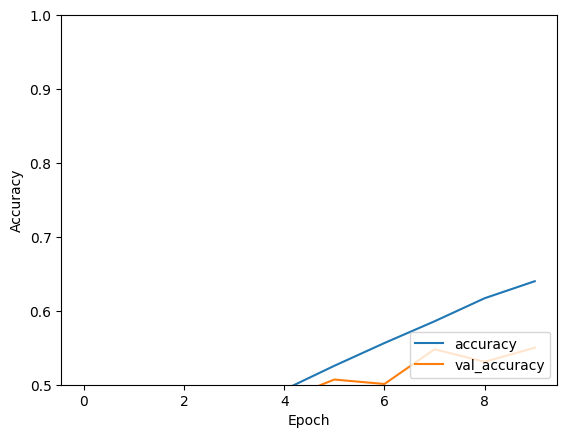

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_small, test_labels_small, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

Berapa akurasi yang Anda dapatkan?

In [26]:
print(test_acc)

0.550000011920929


# TUGAS PRAKTIKUM

## SOAL 1 : Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

### Langkah 1 - Import Library

In [27]:
# Backbone deep learning
import tensorflow as tf

# Keras API di TensorFlow
from tensorflow import keras

# Layer-layer CNN
from keras import layers

# Operasi numerik
import numpy as np

# Visualisasi data/gambar
import matplotlib.pyplot as plt

### Langkah 2 - Load Dataset CIFAR-10

In [28]:
# Dataset CIFAR-10 sudah built-in di Keras (60.000 gambar 32x32, 10 kelas)
from tensorflow.keras.datasets import cifar10

# Memisahkan dataset menjadi training dan testing
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalisasi pixel values agar berada dalam rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Langkah 3 - Visualisasi beberapa gambar

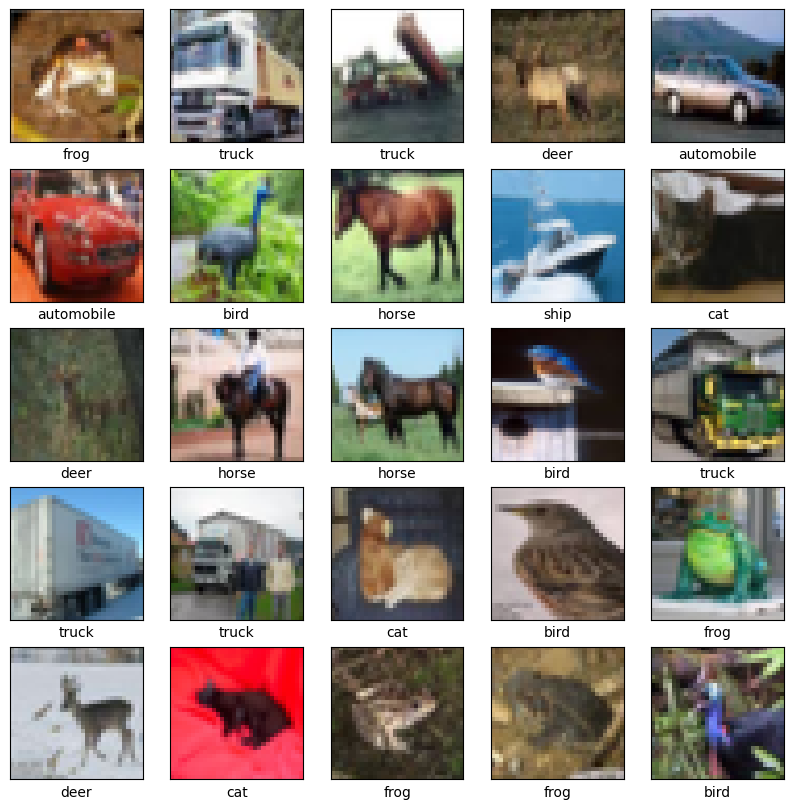

In [29]:
# Nama kelas untuk CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Membuat figure besar untuk menampilkan 25 gambar pertama
plt.figure(figsize=(10,10))

# Loop untuk menampilkan 25 gambar
for i in range(25):
    plt.subplot(5,5,i+1)           # Membagi plot menjadi grid 5x5
    plt.xticks([])                  # Hilangkan ticks sumbu x
    plt.yticks([])                  # Hilangkan ticks sumbu y
    plt.grid(False)                 # Hilangkan grid
    plt.imshow(train_images[i])     # Tampilkan gambar
    plt.xlabel(class_names[train_labels[i][0]])  # Label sesuai kelas

# Tampilkan semua plot
plt.show()

### Langkah 4 - Modifikasi Model CNN

In [30]:
model = tf.keras.models.Sequential([

    # --- Layer Convolution + Pooling pertama ---
    # Ekstraksi fitur awal
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    # Ekstraksi fitur tambahan
    layers.Conv2D(32, (3,3), activation='relu'),
    # Downsampling / reduksi dimensi
    layers.MaxPooling2D((2,2)),
    # Mengurangi overfitting
    layers.Dropout(0.25),

    # --- Layer Convolution + Pooling kedua ---
    # Ekstraksi fitur lebih kompleks
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    # Downsampling kedua
    layers.MaxPooling2D((2,2)),
    # Mengurangi overfitting
    layers.Dropout(0.25),

    # --- Flatten + Fully Connected ---
    # Ubah 2D feature map menjadi 1D
    layers.Flatten(),
    # Fully connected layer
    layers.Dense(512, activation='relu'),
    # Mengurangi overfitting
    layers.Dropout(0.5),
    # Output layer: 10 kelas CIFAR-10
    layers.Dense(10, activation='softmax')
])

### Langkah 5 - Compile Model

In [31]:
# Menentukan optimizer, loss function, dan metric evaluasi
model.compile(
    # Optimizer 'adam' digunakan untuk update weights secara adaptif
    optimizer='adam',
    # Loss function 'sparse_categorical_crossentropy' cocok untuk klasifikasi multi-kelas dengan label integer
    loss='sparse_categorical_crossentropy',
    # Metric 'accuracy' untuk memonitor performa model
    metrics=['accuracy']
)

### Langkah 6 - Data Augmentation

In [32]:
# Import modul ImageDataGenerator dari Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat objek ImageDataGenerator untuk augmentasi gambar
datagen = ImageDataGenerator(
    # rotation_range: memutar gambar hingga 15 derajat
    rotation_range=15,
    # width_shift_range & height_shift_range: geser gambar horizontal & vertikal 10%
    width_shift_range=0.1,
    height_shift_range=0.1,
    # horizontal_flip: membalik gambar secara horizontal
    horizontal_flip=True
)

# Menyesuaikan augmentasi dengan data training
datagen.fit(train_images)

### Langkah 7 - Training Model

In [33]:
# Melatih model menggunakan data augmentation
history = model.fit(
    # datagen.flow(): menghasilkan batch gambar yang sudah di-augmentasi setiap iterasi
    datagen.flow(train_images, train_labels, batch_size=64),
    # epochs: jumlah siklus pelatihan agar model belajar lebih banyak
    epochs=30,
    # validation_data: menilai performa model menggunakan data testing
    validation_data=(test_images, test_labels)
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 256ms/step - accuracy: 0.2849 - loss: 1.9030 - val_accuracy: 0.5027 - val_loss: 1.3422
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 196s 250ms/step - accuracy: 0.4827 - loss: 1.4197 - val_accuracy: 0.5929 - val_loss: 1.1335
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 253ms/step - accuracy: 0.5372 - loss: 1.2837 - val_accuracy: 0.6117 - val_loss: 1.0794
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 194s 248ms/step - accuracy: 0.5755 - loss: 1.1886 - val_accuracy: 0.5960 - val_loss: 1.1757
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 258ms/step - accuracy: 0.5954 - loss: 1.1315 - val_accuracy: 0.6541 - val_loss: 0.9824
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 258ms/step - accuracy: 0.6224 - loss: 1.0711 - val_accuracy: 0.6713 - val_loss: 0.9269
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 251ms/step - accuracy: 0.6327 - loss: 1.0375 - val_accuracy: 0.6907 - val_loss: 0.8708
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 196s 251ms/step - accuracy: 0.6448 - loss: 1.00

### Langkah 8 - Evaluasi Model

In [34]:
# Mengevaluasi performa model pada data testing
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Mencetak akurasi testing dengan 4 angka di belakang koma
print(f"Akurasi testing: {test_acc:.4f}")

313/313 - 7s - 24ms/step - accuracy: 0.7724 - loss: 0.6750
Akurasi testing: 0.7724


### Langkah 9 - Prediksi 1 Gambar

In [35]:
# Import fungsi untuk memuat dan memproses gambar
from keras.preprocessing import image

# Memuat gambar yang akan diprediksi
# target_size=(32,32) harus sama seperti input model CIFAR-10
test_image = image.load_img(
    '/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/dataset/single_prediction/cat_or_dog_1.jpg',
    target_size=(32,32)
)

# Mengubah gambar menjadi array numerik
test_image = image.img_to_array(test_image)

# Menambah dimensi (dari (32,32,3) menjadi (1,32,32,3)) agar cocok untuk model
test_image = np.expand_dims(test_image, axis=0) / 255.0   # Normalisasi 0–1

# Melakukan prediksi menggunakan model yang sudah dilatih
result = model.predict(test_image)

# Mengambil indeks kelas dengan probabilitas tertinggi
pred_class = np.argmax(result)

# Mengambil nama kelas berdasarkan indeks tersebut
prediction = class_names[pred_class]

# Menampilkan hasil prediksi
print(f"Prediksi gambar: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Prediksi gambar: dog


## SOAL 2 : Buatlah model CNN untuk klasifikasi dataset MNIST.

### Langkah 1 - Import Library

In [36]:
# Backbone deep learning (TensorFlow)
import tensorflow as tf

# Keras API yang berada di dalam TensorFlow
from tensorflow import keras

# Layer-layer untuk membangun arsitektur CNN
from keras import layers

# Visualisasi data dan grafik
import matplotlib.pyplot as plt

# Operasi numerik (array, perhitungan matematis)
import numpy as np

### Langkah 2 - Load Dataset MNIST

In [37]:
# Mengambil dataset MNIST dari Keras (gambar angka 0–9)
mnist = tf.keras.datasets.mnist

# Memuat data MNIST dan memisahkannya menjadi data training & testing
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Langkah 3 - Preprocessing Data

In [38]:
# Mengubah bentuk ke 4D (batch, 28, 28, 1) dan menormalisasi pixel 0–1
train_images = train_images.reshape((-1, 28, 28, 1)) / 255.0

# Melakukan reshape + normalisasi untuk data testing
test_images = test_images.reshape((-1, 28, 28, 1)) / 255.0

### Langkah 4 - Visualisasi beberapa gambar

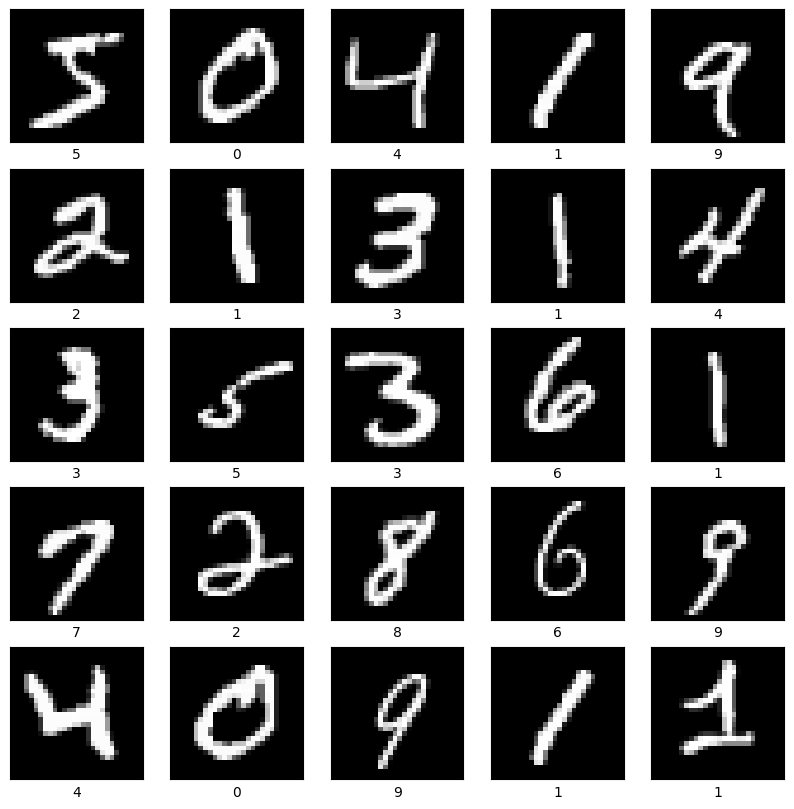

In [39]:
# Membuat canvas plot ukuran 10x10
plt.figure(figsize=(10,10))

# Menampilkan 25 gambar pertama
for i in range(25):

    # Membuat grid 5x5
    plt.subplot(5,5,i+1)

    # Menghilangkan axis X
    plt.xticks([])

    # Menghilangkan axis Y
    plt.yticks([])

    # Menghilangkan grid
    plt.grid(False)

    # Menampilkan gambar MNIST dalam grayscale
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')

    # Menampilkan label angka pada gambar
    plt.xlabel(train_labels[i])

# Menampilkan seluruh plot
plt.show()

### Langkah 5 - Membuat Model CNN

In [40]:
model = tf.keras.models.Sequential([

    # Layer Convolution pertama: ekstraksi fitur awal
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # Layer Convolution kedua: ekstraksi fitur lebih kompleks
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Mengubah fitur menjadi vektor 1D
    layers.Flatten(),

    # Fully Connected layer untuk belajar pola kompleks
    layers.Dense(128, activation='relu'),

    # Dropout untuk mengurangi overfitting
    layers.Dropout(0.5),

    # Output layer dengan 10 kelas (0–9)
    layers.Dense(10, activation='softmax')
])

### Langkah 6 - Compile Model

In [41]:
# Meng-compile model: menentukan optimizer, loss function, dan metrik evaluasi
model.compile(

    # Optimizer yang digunakan saat training
    optimizer='adam',

    # Fungsi loss untuk klasifikasi 10 kelas dengan label numerik
    loss='sparse_categorical_crossentropy',

    # Metrik evaluasi yang dipantau selama training & testing
    metrics=['accuracy']
)

### Langkah 7 - Training Model

In [42]:
# Melatih model menggunakan data training
history = model.fit(

    # Data gambar untuk training
    train_images, train_labels,

    # Jumlah epoch (berapa kali seluruh data di-ulang)
    epochs=10,

    # Jumlah sampel per batch selama training
    batch_size=64,

    # Data validasi untuk mengevaluasi performa tiap epoch
    validation_data=(test_images, test_labels)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.8330 - loss: 0.5319 - val_accuracy: 0.9825 - val_loss: 0.0540
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 55ms/step - accuracy: 0.9740 - loss: 0.0907 - val_accuracy: 0.9890 - val_loss: 0.0339
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9799 - loss: 0.0672 - val_accuracy: 0.9893 - val_loss: 0.0326
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9834 - loss: 0.0548 - val_accuracy: 0.9901 - val_loss: 0.0293
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9867 - loss: 0.0424 - val_accuracy: 0.9899 - val_loss: 0.0278
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9908 - val_loss: 0.0251
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 59ms/step - accuracy: 0.9912 - loss: 0.0293 - val_accuracy: 0.9920 - val_loss: 0.0233
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.9909 - loss: 0.0279 - 

### Langkah 8 - Evaluasi Model

In [43]:
# Mengevaluasi performa model pada data testing
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Menampilkan akurasi hasil evaluasi
print(f"Akurasi testing: {test_acc:.4f}")

313/313 - 3s - 8ms/step - accuracy: 0.9931 - loss: 0.0256
Akurasi testing: 0.9931


### Langkah 9 - Prediksi 1 Gambar

In [44]:
# Import modul untuk memproses gambar
from keras.preprocessing import image

# Mengambil satu gambar dari dataset testing (gambar pertama)
test_image = test_images[0].reshape(1, 28, 28, 1)

# Melakukan prediksi menggunakan model
result = model.predict(test_image)

# Mengambil kelas dengan probabilitas tertinggi
pred_class = np.argmax(result)

# Mencetak hasil prediksi dan label aslinya
print(f"Prediksi gambar: {pred_class}, Label asli: {test_labels[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Prediksi gambar: 7, Label asli: 7
